In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

conference events in last 5 years in the university of "A". this data should contains these columns: "name of event", "the place which it performs", "datetime", "duration", "number of attendance", "if the conference is international", "subject of the conference", "quality of sound systems in place", "capacity of the place", "the money that spend for that event", "any income amount if available".

In [3]:
data = pd.read_csv("conference_data.csv")

In [12]:
data['Renting']

0        12
1        12
2        30
3       120
4        10
       ... 
9995     10
9996     25
9997     10
9998     18
9999     12
Name: Renting, Length: 10000, dtype: int64

In [5]:
import torch
from torch import nn


In [44]:
import Model, Engine, DataLoader

seq = 4
batch_size = 8
dataloader = DataLoader.Dataloader("conference_data.csv", sequence_length=seq, approach="Time_series", seed=42)
train_data, val_data, test_data = dataloader.creat_dataloaders(batch_size=batch_size)

device = "cuda" if torch.cuda.is_available() else "cpu"

INPUT_SIZE = len(train_data.dataset[0][0][0])  # number of features
HIDDEN_UNITS = 32
NUM_LAYERS = 3
OUTPUT_SIZE = 5
EPOCHS = 500

model_name = f"Conference_V0"
experiment = f"RNN_{batch_size}"

model0 = Model.RNN_V0(INPUT_SIZE, HIDDEN_UNITS, NUM_LAYERS, OUTPUT_SIZE)

loss_fn = nn.MSELoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model0.parameters(), learning_rate)

model0_results, model0_true_predict = Engine.train(model=model0,
                                                   train_dataloader=train_data,
                                                   test_dataloader=val_data,
                                                   loss_fn=loss_fn,
                                                   optimizer=optimizer,
                                                   epochs=EPOCHS,
                                                   experiment_name=model_name,
                                                   model_name=experiment,
                                                   early_stop_patience=10,
                                                   device=device,
                                                   writer=False)



  0%|          | 0/500 [00:00<?, ?it/s]

Epoch 0 | train: Loss 0.078014 Accuracy -0.6205 | validation: Loss 0.044838 Accuracy -0.0340
Epoch 1 | train: Loss 0.034976 Accuracy 0.0243 | validation: Loss 0.027392 Accuracy 0.0404
Epoch 2 | train: Loss 0.026317 Accuracy 0.1178 | validation: Loss 0.023279 Accuracy 0.2233
Epoch 3 | train: Loss 0.023623 Accuracy 0.1239 | validation: Loss 0.022943 Accuracy 0.0613
Epoch 4 | train: Loss 0.021905 Accuracy 0.1524 | validation: Loss 0.019637 Accuracy -0.1208
Epoch 5 | train: Loss 0.020272 Accuracy 0.1882 | validation: Loss 0.017825 Accuracy 0.2070
Epoch 6 | train: Loss 0.019213 Accuracy 0.1904 | validation: Loss 0.017706 Accuracy 0.1833
Epoch 7 | train: Loss 0.018400 Accuracy 0.1505 | validation: Loss 0.020345 Accuracy 0.2718
Epoch 8 | train: Loss 0.017763 Accuracy 0.2280 | validation: Loss 0.016488 Accuracy 0.0644
Epoch 9 | train: Loss 0.017019 Accuracy 0.2316 | validation: Loss 0.017725 Accuracy 0.0863
Epoch 10 | train: Loss 0.017022 Accuracy 0.2045 | validation: Loss 0.015840 Accuracy 0.

In [45]:
dataloader.predict(model=model0, dataloader=test_data, device=device)

tensor([0.2888, 0.0213], device='cuda:0', grad_fn=<SliceBackward0>)
tensor([0.3789, 0.1611], device='cuda:0', grad_fn=<SliceBackward0>)
tensor([0.3813, 0.4391], device='cuda:0', grad_fn=<SliceBackward0>)
tensor([0.5675, 0.8696], device='cuda:0', grad_fn=<SliceBackward0>)


In [46]:
import Model, Engine, DataLoader

seq = 4
batch_size = 8
dataloader = DataLoader.Dataloader("conference_data.csv", sequence_length=seq, approach="Time_series", seed=42)
train_data, val_data, test_data = dataloader.creat_dataloaders(batch_size=batch_size)

device = "cuda" if torch.cuda.is_available() else "cpu"

INPUT_SIZE = len(train_data.dataset[0][0][0])  # number of features
HIDDEN_UNITS = 32
NUM_LAYERS = 3
OUTPUT_SIZE = 5
EPOCHS = 500

model_name = f"Conference_V0"
experiment = f"GRU_{batch_size}"

model1 = Model.GRU_V0(INPUT_SIZE, HIDDEN_UNITS, NUM_LAYERS, OUTPUT_SIZE)

loss_fn = nn.MSELoss()
learning_rate = 0.03
optimizer = torch.optim.SGD(model1.parameters(), learning_rate)

model1_results, model1_true_predict = Engine.train(model=model1,
                                                   train_dataloader=train_data,
                                                   test_dataloader=val_data,
                                                   loss_fn=loss_fn,
                                                   optimizer=optimizer,
                                                   epochs=EPOCHS,
                                                   experiment_name=model_name,
                                                   model_name=experiment,
                                                   early_stop_patience=10,
                                                   device=device,
                                                   writer=False)



  0%|          | 0/500 [00:00<?, ?it/s]

Epoch 0 | train: Loss 0.182353 Accuracy -6.4966 | validation: Loss 0.118036 Accuracy -1.9494
Epoch 1 | train: Loss 0.091908 Accuracy -0.7682 | validation: Loss 0.083157 Accuracy -0.2463
Epoch 2 | train: Loss 0.078884 Accuracy -0.2580 | validation: Loss 0.077064 Accuracy -0.0646
Epoch 3 | train: Loss 0.076686 Accuracy -0.1394 | validation: Loss 0.074042 Accuracy -0.1697
Epoch 4 | train: Loss 0.075494 Accuracy -0.2562 | validation: Loss 0.074421 Accuracy -0.4508
Epoch 5 | train: Loss 0.075018 Accuracy -0.1795 | validation: Loss 0.073583 Accuracy -0.0830
Epoch 6 | train: Loss 0.074399 Accuracy -0.1582 | validation: Loss 0.071674 Accuracy -0.3200
Epoch 7 | train: Loss 0.073157 Accuracy -0.1968 | validation: Loss 0.071676 Accuracy -0.1087
Epoch 8 | train: Loss 0.072063 Accuracy -0.1150 | validation: Loss 0.071255 Accuracy -0.1721
Epoch 9 | train: Loss 0.070858 Accuracy -0.1355 | validation: Loss 0.067702 Accuracy -0.1852
Epoch 10 | train: Loss 0.069523 Accuracy -0.0867 | validation: Loss 0.

In [48]:
import Model, Engine, DataLoader

seq = 4
batch_size = 8
dataloader = DataLoader.Dataloader("conference_data.csv", sequence_length=seq, approach="Time_series", seed=42)
train_data, val_data, test_data = dataloader.creat_dataloaders(batch_size=batch_size)

device = "cuda" if torch.cuda.is_available() else "cpu"

INPUT_SIZE = len(train_data.dataset[0][0][0])  # number of features
HIDDEN_UNITS = 32
NUM_LAYERS = 3
OUTPUT_SIZE = 5
EPOCHS = 500

model_name = f"Conference_V0"
experiment = f"LSTM_{batch_size}"

model2 = Model.LSTM_V0(INPUT_SIZE, HIDDEN_UNITS, NUM_LAYERS, OUTPUT_SIZE)

loss_fn = nn.MSELoss()
learning_rate = 0.01
optimizer = torch.optim.Adam(model2.parameters(), learning_rate)

model2_results, model2_true_predict = Engine.train(model=model2,
                                                   train_dataloader=train_data,
                                                   test_dataloader=val_data,
                                                   loss_fn=loss_fn,
                                                   optimizer=optimizer,
                                                   epochs=EPOCHS,
                                                   experiment_name=model_name,
                                                   model_name=experiment,
                                                   early_stop_patience=10,
                                                   device=device,
                                                   writer=False)



  0%|          | 0/500 [00:00<?, ?it/s]

Epoch 0 | train: Loss 0.093253 Accuracy -1.5929 | validation: Loss 0.046630 Accuracy -0.2022
Epoch 1 | train: Loss 0.034263 Accuracy 0.0423 | validation: Loss 0.018424 Accuracy 0.0982
Epoch 2 | train: Loss 0.018521 Accuracy 0.1536 | validation: Loss 0.016010 Accuracy 0.1603
Epoch 3 | train: Loss 0.017503 Accuracy 0.1508 | validation: Loss 0.016768 Accuracy -0.1002
Epoch 4 | train: Loss 0.016694 Accuracy 0.1185 | validation: Loss 0.016778 Accuracy 0.0440
Epoch 5 | train: Loss 0.015866 Accuracy 0.0564 | validation: Loss 0.013005 Accuracy 0.2517
Epoch 6 | train: Loss 0.014415 Accuracy 0.1716 | validation: Loss 0.013088 Accuracy 0.2883
Epoch 7 | train: Loss 0.014509 Accuracy 0.1998 | validation: Loss 0.013566 Accuracy 0.2008
Epoch 8 | train: Loss 0.013941 Accuracy 0.2208 | validation: Loss 0.013958 Accuracy -0.2986
Epoch 9 | train: Loss 0.014111 Accuracy 0.2374 | validation: Loss 0.012610 Accuracy 0.0463
Epoch 10 | train: Loss 0.013770 Accuracy 0.2267 | validation: Loss 0.014745 Accuracy 0

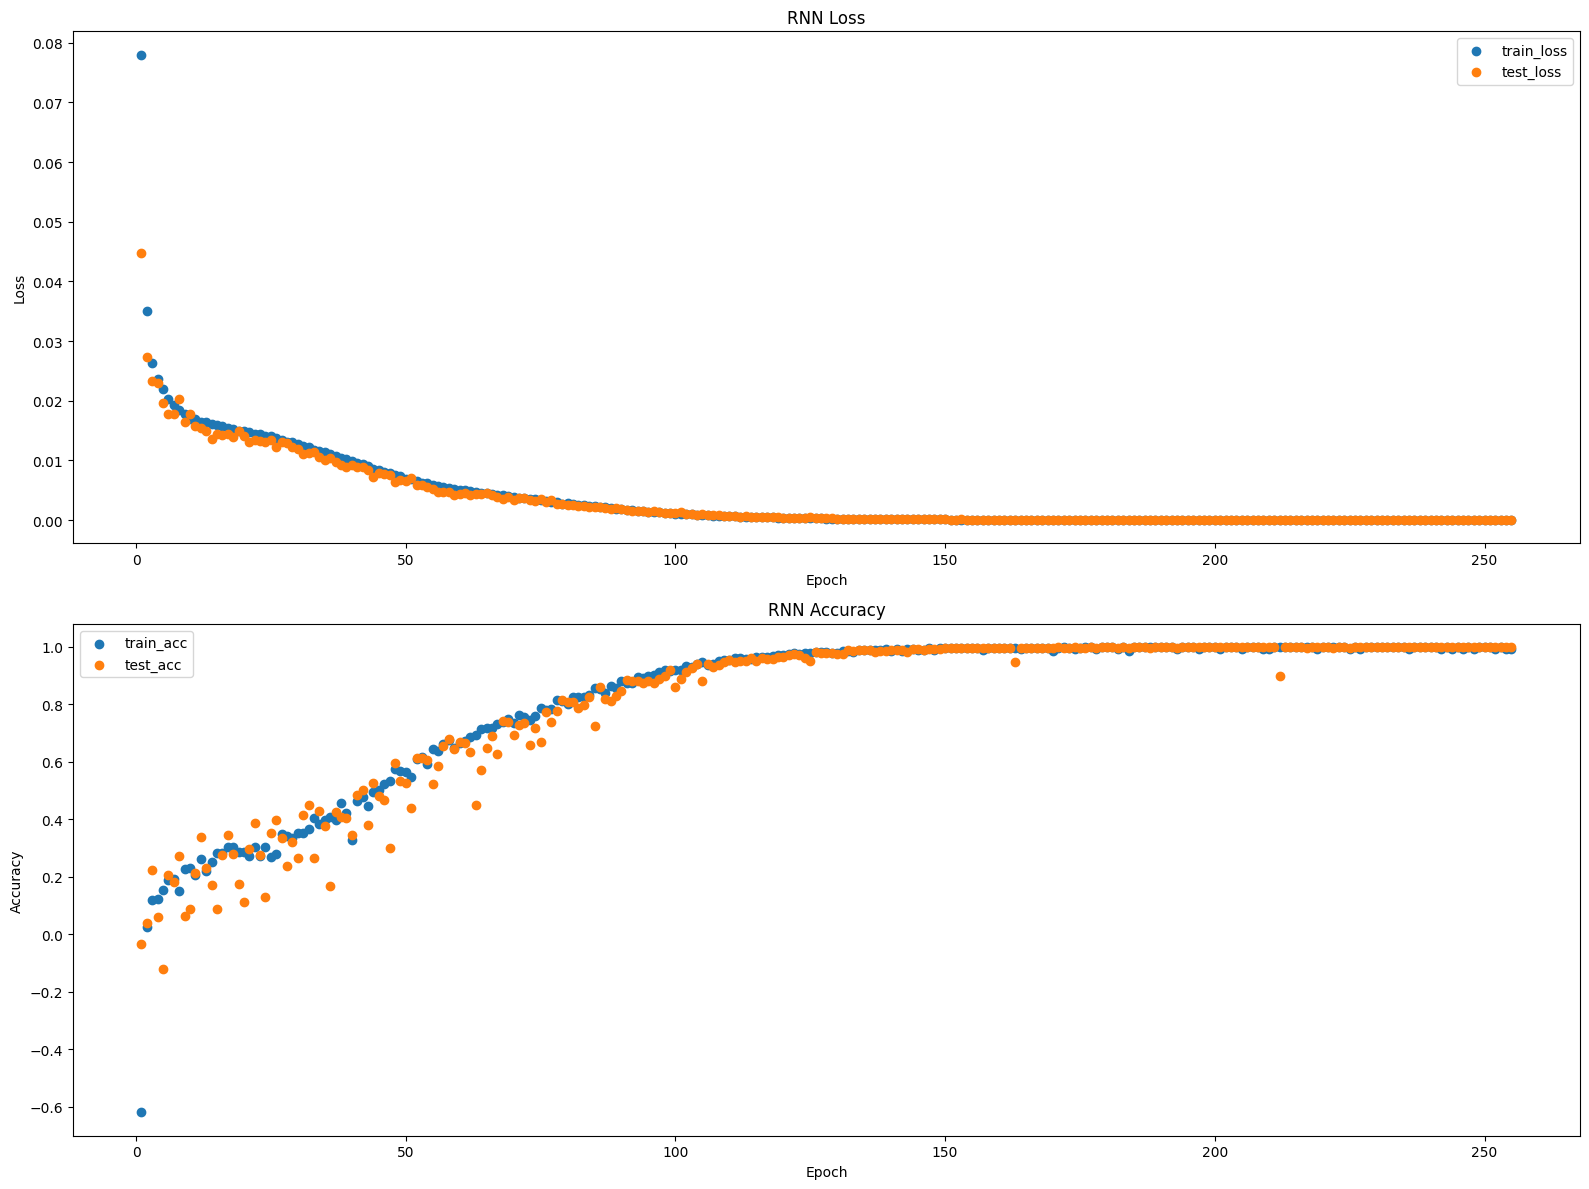

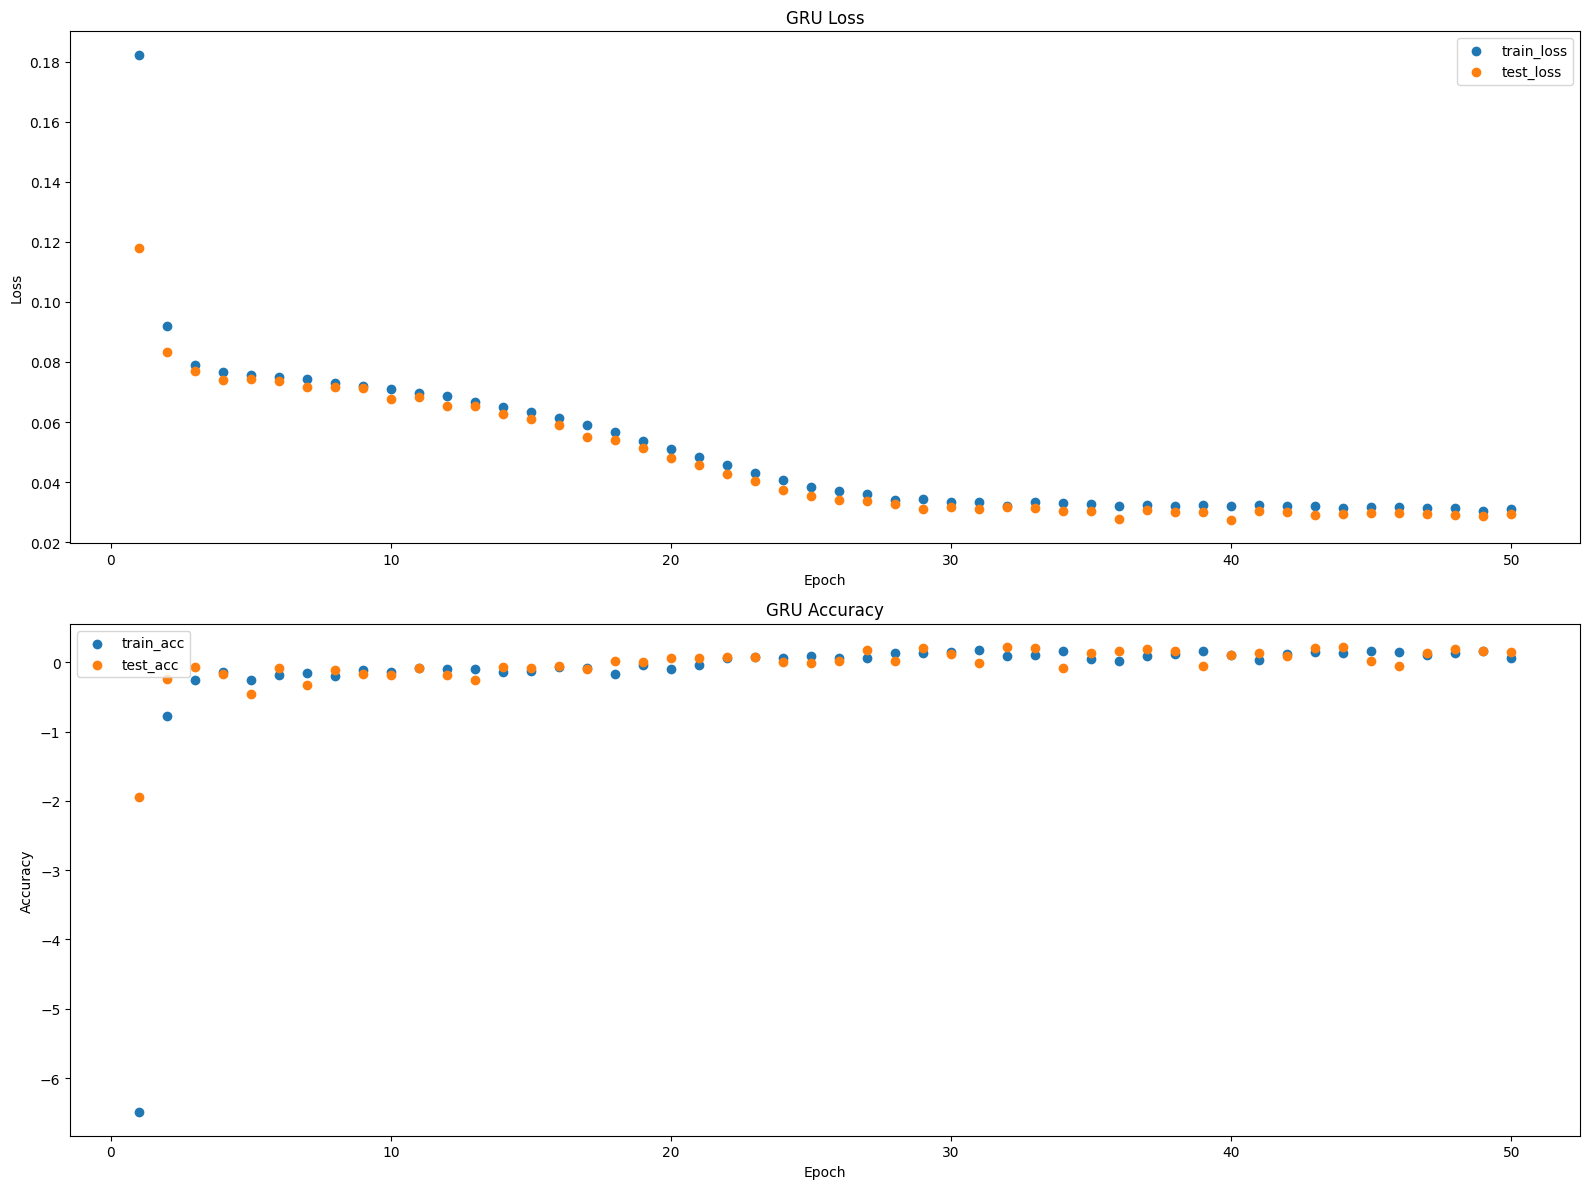

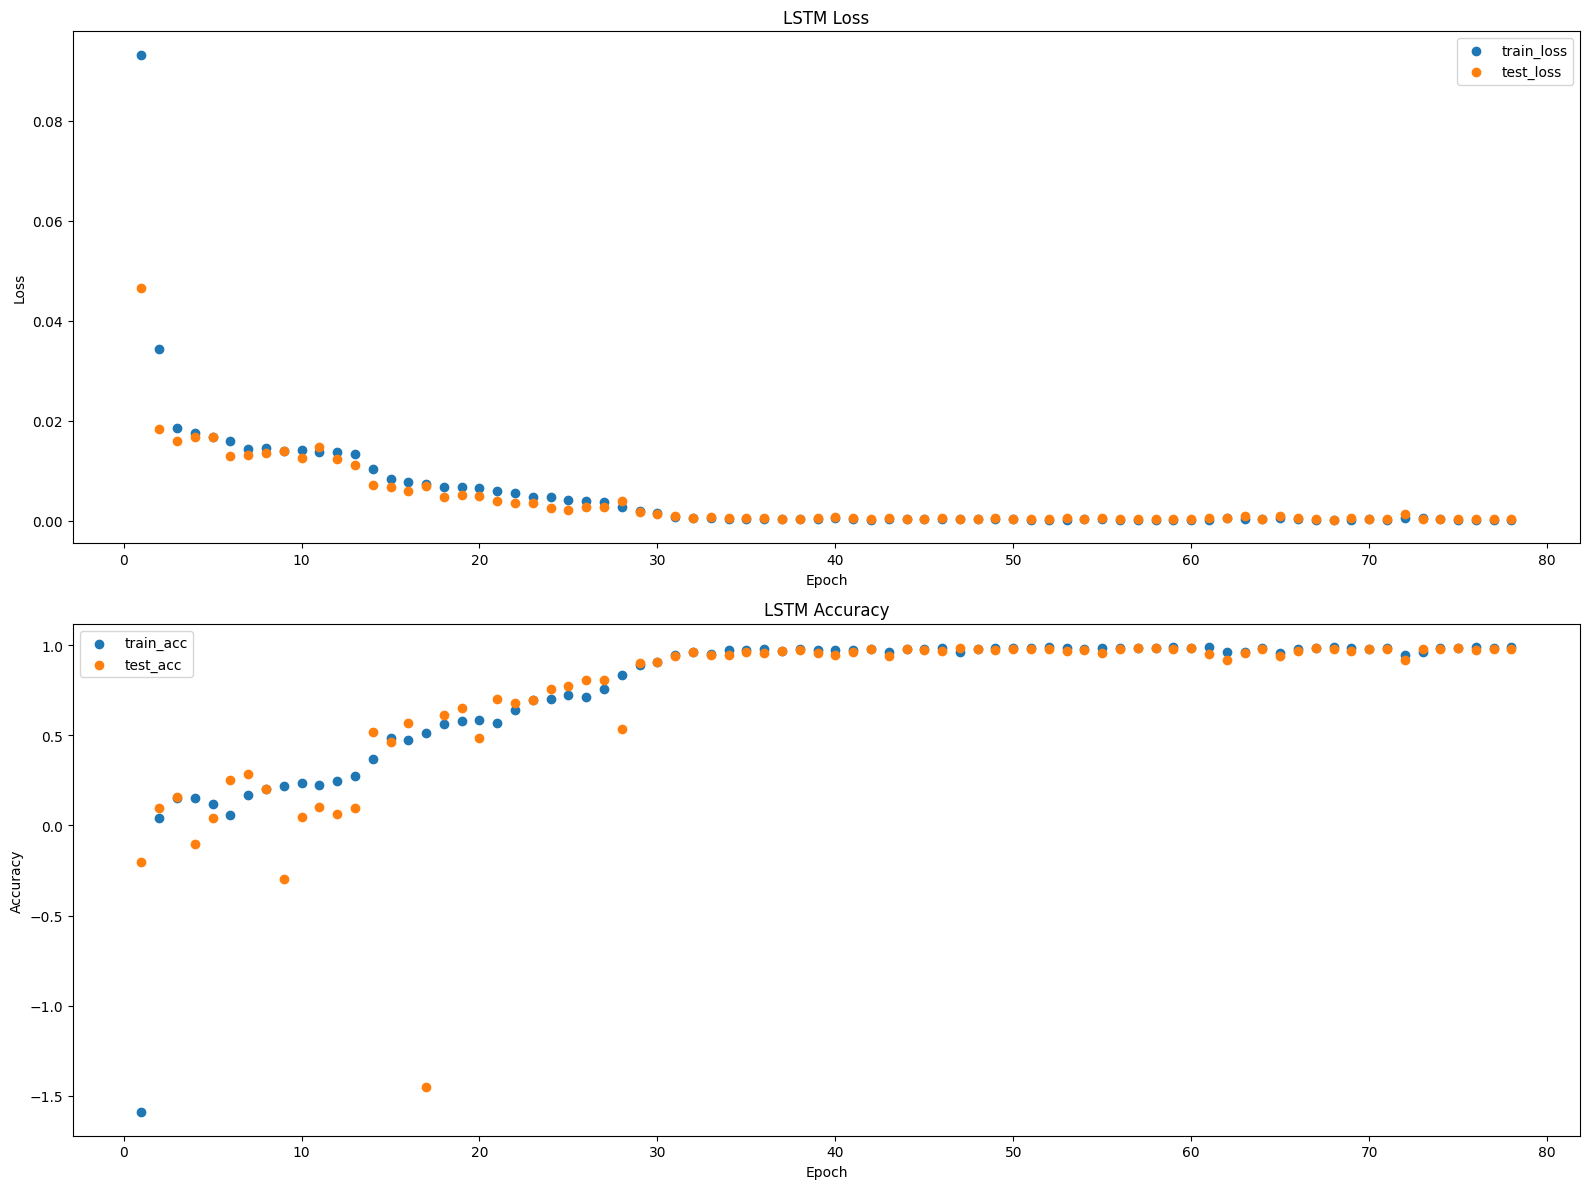

In [49]:
import Utils
Utils.plot(model0_results, "RNN")
Utils.plot(model1_results, "GRU")
Utils.plot(model2_results, "LSTM")

In [51]:
import Model, Engine, DataLoader

seq = 4
batch_size = 8
dataloader = DataLoader.Dataloader("conference_data.csv", sequence_length=seq, approach="CNN", seed=42)
train_data, val_data, test_data = dataloader.creat_dataloaders(batch_size=batch_size)

device = "cuda" if torch.cuda.is_available() else "cpu"

INPUT_SIZE = 6  # number of features
HIDDEN_UNITS = 32
NUM_LAYERS = 3
OUTPUT_SIZE = 5
EPOCHS = 500

model_name = f"Conference_V0"
experiment = f"NN_{batch_size}"

model3 = Model.CNN_V0(INPUT_SIZE, HIDDEN_UNITS, OUTPUT_SIZE)

loss_fn = nn.MSELoss()
learning_rate = 0.05
optimizer = torch.optim.Adam(model3.parameters(), learning_rate)

model3_results, model3_true_predict = Engine.train(model=model3,
                                                   train_dataloader=train_data,
                                                   test_dataloader=val_data,
                                                   loss_fn=loss_fn,
                                                   optimizer=optimizer,
                                                   epochs=EPOCHS,
                                                   experiment_name=model_name,
                                                   model_name=experiment,
                                                   early_stop_patience=10,
                                                   device=device,
                                                   writer=False)



  0%|          | 0/500 [00:00<?, ?it/s]

Epoch 0 | train: Loss 0.038841 Accuracy -0.9558 | validation: Loss 0.011356 Accuracy 0.5182
Epoch 1 | train: Loss 0.009249 Accuracy 0.5200 | validation: Loss 0.005992 Accuracy 0.5237
Epoch 2 | train: Loss 0.005440 Accuracy 0.6850 | validation: Loss 0.003849 Accuracy 0.8047
Epoch 3 | train: Loss 0.003346 Accuracy 0.8088 | validation: Loss 0.002501 Accuracy 0.8611
Epoch 4 | train: Loss 0.001915 Accuracy 0.8738 | validation: Loss 0.001261 Accuracy 0.9115
Epoch 5 | train: Loss 0.000450 Accuracy 0.9744 | validation: Loss 0.000244 Accuracy 0.9860
Epoch 6 | train: Loss 0.000234 Accuracy 0.9863 | validation: Loss 0.000055 Accuracy 0.9960
Epoch 7 | train: Loss 0.000048 Accuracy 0.9972 | validation: Loss 0.000050 Accuracy 0.9963
Epoch 8 | train: Loss 0.000045 Accuracy 0.9966 | validation: Loss 0.000018 Accuracy 0.9989
Epoch 9 | train: Loss 0.000025 Accuracy 0.9979 | validation: Loss 0.000013 Accuracy 0.9990
Epoch 10 | train: Loss 0.000017 Accuracy 0.9989 | validation: Loss 0.000008 Accuracy 0.99